<a href="https://colab.research.google.com/github/mellmelt/self-study/blob/main/20220121_%EC%A1%B8%EC%9D%8C%EC%9A%B4%EC%A0%84_%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime 
from pandas_datareader import data

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
data1 = pd.read_csv('/content/2014년 졸음운전 교통사고.csv',encoding='euc-kr') 
data2 = pd.read_csv('/content/2015년 졸음운전 교통사고.csv',encoding='euc-kr') 
data3 = pd.read_csv('/content/2016년 졸음운전 교통사고.csv',encoding='euc-kr') 

# 1번 문제

3개의 데이터를 병합하시오.

## 데이터의 columns와 index 확인하기

In [10]:
data1.head(3)

,구분,사고(건),사망(명),부상(명)
0,2014년1월,169,7,347
1,2014년2월,145,3,268
2,2014년3월,206,12,358


In [11]:
data2.head(3)

,구분,사고(건),사망(명),부상(명)
0,2015년1월,205,8,375
1,2015년2월,175,8,375
2,2015년3월,237,4,492


In [12]:
data3.head(3)

,구분,사고(건),사망(명),부상(명)
0,2016년1월,192,5,387
1,2016년2월,174,6,328
2,2016년3월,217,7,435


## concat로 데이터 병합하기

merge는 두 데이터프레임의 공통된 열 또는 행을 기준으로 병합하고, concat은 단순히 데이터를 연결한다. 이 노트에서 사용하는 3가지 데이터는 공통된 열 이름은 있지만, 데이터가 각기 다르므로 공통된 열이 없다고 볼 수 있다. 따라서 concat으로 데이터를 병합하였다.

In [20]:
# data = pd.concat([data1, data2, data3], axis = 1) # axis=1로 설정해주어야 데이터가 옆으로 연결된다.
# data

# 해당 셀에 문제가 있다. 날짜(각 데이터의 구분 columns)는 따로 구분되어야 하는데, 옆으로 합치면 그것이 구분되지 않는다. 따라서 axis =1 을 제거해 데이터를 밑으로 병합해야 한다. 그러면 날짜는 

,구분,사고(건),사망(명),부상(명),구분,사고(건),사망(명),부상(명),구분,사고(건),사망(명),부상(명)
0,2014년1월,169,7,347,2015년1월,205,8,375,2016년1월,192,5,387
1,2014년2월,145,3,268,2015년2월,175,8,375,2016년2월,174,6,328
2,2014년3월,206,12,358,2015년3월,237,4,492,2016년3월,217,7,435
3,2014년4월,182,4,360,2015년4월,227,10,486,2016년4월,216,7,419
4,2014년5월,218,17,474,2015년5월,231,9,504,2016년5월,239,13,522
5,2014년6월,233,13,457,2015년6월,207,8,401,2016년6월,200,12,362
6,2014년7월,229,14,431,2015년7월,273,7,556,2016년7월,227,9,460
7,2014년8월,222,9,447,2015년8월,268,19,534,2016년8월,230,7,490
8,2014년9월,225,15,430,2015년9월,252,10,501,2016년9월,187,13,347
9,2014년10월,210,14,392,2015년10월,214,14,475,2016년10월,183,10,367


In [22]:
data = pd.concat([data1, data2, data3])
data.set_index('구분',inplace=True) # 구분 columns를 행번호로 지정하는 문장이다
data

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358
2014년4월,182,4,360
2014년5월,218,17,474
2014년6월,233,13,457
2014년7월,229,14,431
2014년8월,222,9,447
2014년9월,225,15,430


# 2번 문제

연도, 월별로 인덱스를 설정(멀티인덱스)하고 데이터를 보여주시오.

멀티인덱스 방법을 몰라서 solution을 참고했다. 멀티인덱스 학습 노트를 새로 만들어야겠다.

In [25]:
ans = data.copy()
ans.index = pd.to_datetime(ans.index, format='%Y년%m월')
ans.set_index([ans.index.year,ans.index.month], inplace=True)
ans.index.names = ['연도','월']
ans

사고(건)  사망(명)  부상(명)
연도   월                      
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474
     6     233     13    457
     7     229     14    431
     8     222      9    447
     9     225     15    430
     10    210     14    392
     11    209     10    386
     12    178     12    329
2015 1     205      8    375
     2     175      8    375
     3     237      4    492
     4     227     10    486
     5     231      9    504
     6     207      8    401
     7     273      7    556
     8     268     19    534
     9     252     10    501
     10    214     14    475
     11    199      3    398
     12    213      8    428
2016 1     192      5    387
     2     174      6    328
     3     217      7    435
     4     216      7    419
     5     239     13    522
     6     200     12    362
     7     227      9    460
     8     230      7    490
     9     187     13    347
     10    183     10    367
     11    200      5    418
     12    168      4    364

# 3번 문제

연도 및 월별 평균 사망자를 보여주시오.

In [35]:
y = ans.groupby('연도').mean()[['사망(명)']] # groupby :같은 값을 하나로 묶어 통계 또는 집계 결과를 얻기 위해 사용하는 것
y

,사망(명)
연도,
2014,10.833333
2015,9.000000
2016,8.166667


In [36]:
m = ans.groupby('월').mean()[['사망(명)']]
m

,사망(명)
월,
1,6.666667
2,5.666667
3,7.666667
4,7.000000
5,13.000000
6,11.000000
7,10.000000
8,11.666667
9,12.666667


# 4번 문제

2016년 사고대비 사망률을 구하시오.

In [38]:
d_2016 = (ans.loc[2016])['사망(명)'].sum()/(ans.loc[2016])['사고(건)'].sum()
# loc 인덱서로 고급 인덱싱 (loc : 라벨값 기반의 2차원 인덱싱)
# sum 메소드로 사망자 합계 구함
d_2016

0.04027949034114262

# 5번 문제

2014년도 월별 사망, 부상 데이터를 bar 차트로 보여주시오.

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backen

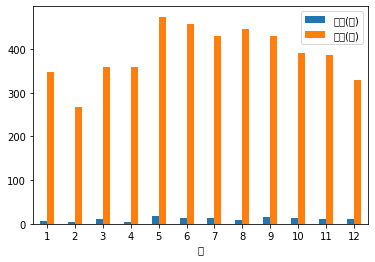

In [39]:
ans.loc[2014][['사망(명)','부상(명)']].plot(kind='bar',rot=0)
plt.show()
# 한글폰트 설정을 하지 않아 그래프 내용이 깨진다

# 6번 문제

2015년 대비 사망이 가장 많이 증가한 2016년도 월을 구하시오.

In [41]:
(ans.loc[2016,'사망(명)'] - ans.loc[2015,'사망(명)']).nlargest(1,keep='all')

월
5    4
6    4
Name: 사망(명), dtype: int64

# 리뷰

멀티인덱스를 다루는 법을 몰라 많이 헤맸던 예제이다. 그리고 loc 고급 인덱싱, groupby 메소드를 사용하는 방법을 배웠다. 데이터 병합 단계에서 단순히 데이터를 합치기만 하면 되는게 아니라, 원하는대로 사용하기 위해 어떻게 병합해야 하는지를 잘 생각해봐야 한다는 것을 깨달았다.